In [276]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean', 'std', 'hist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [277]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = 'eBOSS_ELG_full_ALL_v4.dat_cutted_really_masked_chunk22.fits'
fn_obiwan = 'obiwan_200per_0125_really_masked_chunk22.fits'
fn_sim = 'sim_200per_0125.fits'
DAT = fits.getdata(topdir+fn)
obiwan = fits.getdata(topdir+fn_obiwan)
sim = fits.getdata(topdir+fn_sim)
fn_sim_m = 'sim_200per_0125_really_masked_chunk22.fits'
sim_m = fits.getdata(topdir+fn_sim_m)

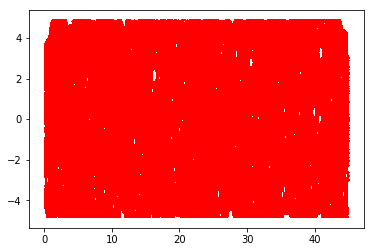

In [278]:
plt.plot(sim_m['ra'],sim_m['dec'],'r,')

[ 3.82231534  0.10710342  0.09110922]


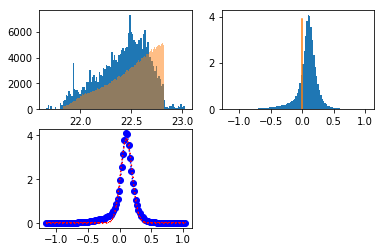

In [279]:
plt.subplot(2,2,1)
z_mag_hist1 = plt.hist(obiwan['g'],bins = 100)
z_mag2 = 22.5 - 2.5 * np.log10(obiwan['flux_g'] / obiwan['mw_transmission_g'])
z_mag_hist2 = plt.hist(z_mag2, bins=100,alpha=0.5)
plt.subplot(2,2,2)
n,bins,patches = plt.hist(z_mag2-obiwan['g'],bins=100,normed = True)
x = np.zeros(40)
y = np.arange(0,4,0.1)
plt.plot(x,y)
plt.subplot(2,2,3)
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
bin_centers = bins[:-1]+(bins[1]-bins[0])/2.0
bin_borders = bins
bin_heights = n

x = ar(bin_centers)
y = ar(bin_heights)

n = len(x)                          #the number of data
mean = 0.25                #note this correction
sigma = 0.5       #note this correction

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'bo:',label='data')
plt.plot(x,gaus(x,*popt),'r,:',label='fit')
print(popt)
#z band difference is: 0.08528844 +/- 0.08669324 (get +/- 1 sigma, <-0.0014048000000000116 or >0.17198168)

In [280]:
def mag_dist(mag,data):
    mag_input = data[mag]
    g     = 22.5 - 2.5 * np.log10(data['flux_g'] / data['mw_transmission_g'])
    r_mag = 22.5 - 2.5 * np.log10(data['flux_r'] / data['mw_transmission_r'])
    z_mag = 22.5 - 2.5 * np.log10(data['flux_z'] / data['mw_transmission_z'])
    if mag == 'g':
        mag_output = g
    if mag == 'r':
        mag_output = r_mag
    if mag == 'z':
        mag_output = z_mag
    mag_diff = mag_output-mag_input
    sup = mag_diff.mean() + mag_diff.std()
    inf = mag_diff.mean() - mag_diff.std()
    sel = (mag_diff<sup)&(mag_diff>inf)
    dat_sel = data[sel==False] 
    plt.hexbin(dat_sel['ra'],dat_sel['dec'],gridsize = 50)
    plt.colorbar()
    plt.title('# of obiwan outputs '+mag+' band mag outside 1 sig')

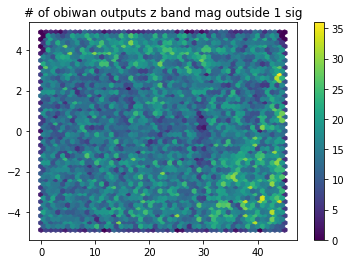

In [281]:
mag_dist('z',obiwan)

0.0796454163277
0.081416885787
0.0017714694592999986


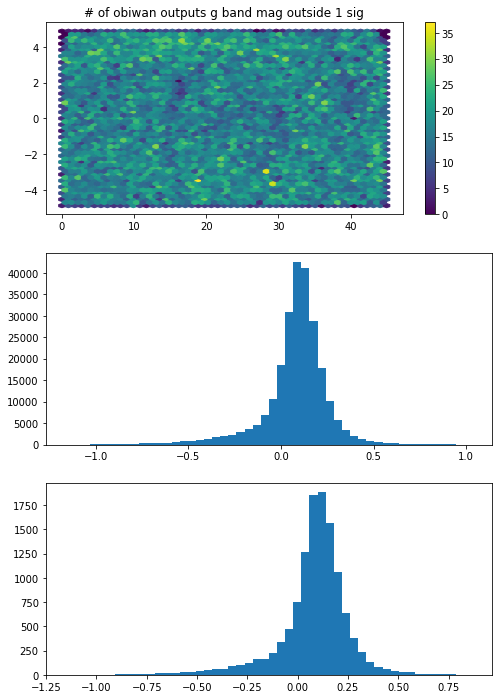

In [282]:
plt.figure(figsize = (8,12))
plt.subplot(3,1,1)
mag_dist('g',obiwan)
g     = 22.5 - 2.5 * np.log10(obiwan['flux_g'] / obiwan['mw_transmission_g'])
plt.subplot(3,1,2)
hst = plt.hist(g-obiwan['g'],bins = 50)
print((g-obiwan['g']).mean())
ra = obiwan['ra']
dec = obiwan['dec']
sel = (ra>27)&(ra<33)&(dec>-2)&(dec<2)
obiwan_sel = obiwan[sel]
g_sel = 22.5 - 2.5 * np.log10(obiwan_sel['flux_g'] / obiwan_sel['mw_transmission_g'])
plt.subplot(3,1,3)
hist = plt.hist(g_sel - obiwan_sel['g'],bins = 50)
print((g_sel - obiwan_sel['g']).mean())
print(0.081416885787 - 0.0796454163277)

(22.510106386608548, 22.508998219100459, 0.0011081675080895081)

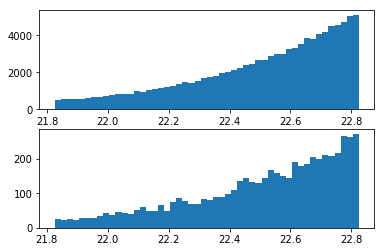

In [283]:
plt.subplot(2,1,1)
hist1 = plt.hist(DAT['g'],bins = 50)
plt.subplot(2,1,2)
ra = DAT['ra']
dec = DAT['dec']
sel = (ra>27)&(ra<33)&(dec>-2)&(dec<2)
DAT_sel = DAT[sel]
hist2 = plt.hist(DAT_sel['g'],bins = 50)
DAT_sel['g'].mean(),DAT['g'].mean(),DAT_sel['g'].mean()-DAT['g'].mean()

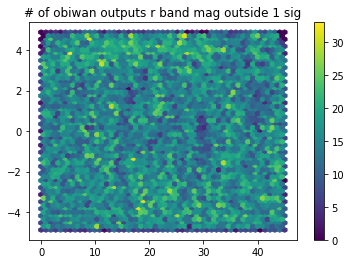

In [284]:
mag_dist('r',obiwan)

Text(0.5,1,'r-z after ELG cut to output chunk22')

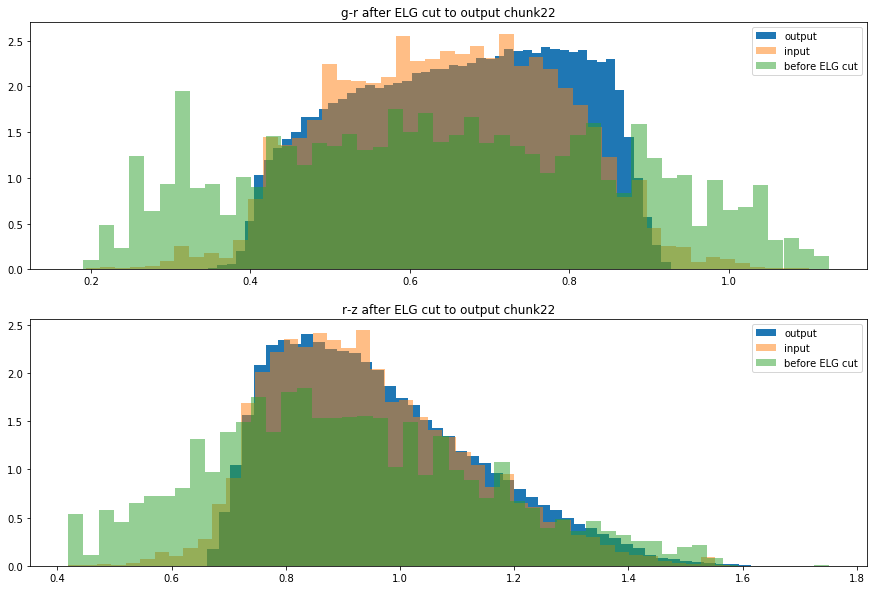

In [285]:
def mag(data,mag):
    mag_input = data[mag]
    g     = 22.5 - 2.5 * np.log10(data['flux_g'] / data['mw_transmission_g'])
    r_mag = 22.5 - 2.5 * np.log10(data['flux_r'] / data['mw_transmission_r'])
    z_mag = 22.5 - 2.5 * np.log10(data['flux_z'] / data['mw_transmission_z'])
    if mag == 'g':
        return g
    if mag == 'r':
        return r_mag
    if mag == 'z':
        return z_mag
#g-r hist input,output (to ELG cut)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.hist(mag(obiwan,'g')-mag(obiwan,'r'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['g'] - obiwan['r'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.hist(sim['g'] - sim['r'], label = 'before ELG cut', bins = 50, stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('g-r after ELG cut to output chunk22')
#r-z hist input,output (to ELG cut)
plt.subplot(2,1,2)
plt.hist(mag(obiwan,'r')-mag(obiwan,'z'),label = 'output', bins = 50,stacked = False, normed = True)
plt.legend()
plt.hist(obiwan['r'] - obiwan['z'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.hist(sim['r'] - sim['z'], label = 'before ELG cut', bins = 50, stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('r-z after ELG cut to output chunk22')

Text(0.5,1,'z chunk22')

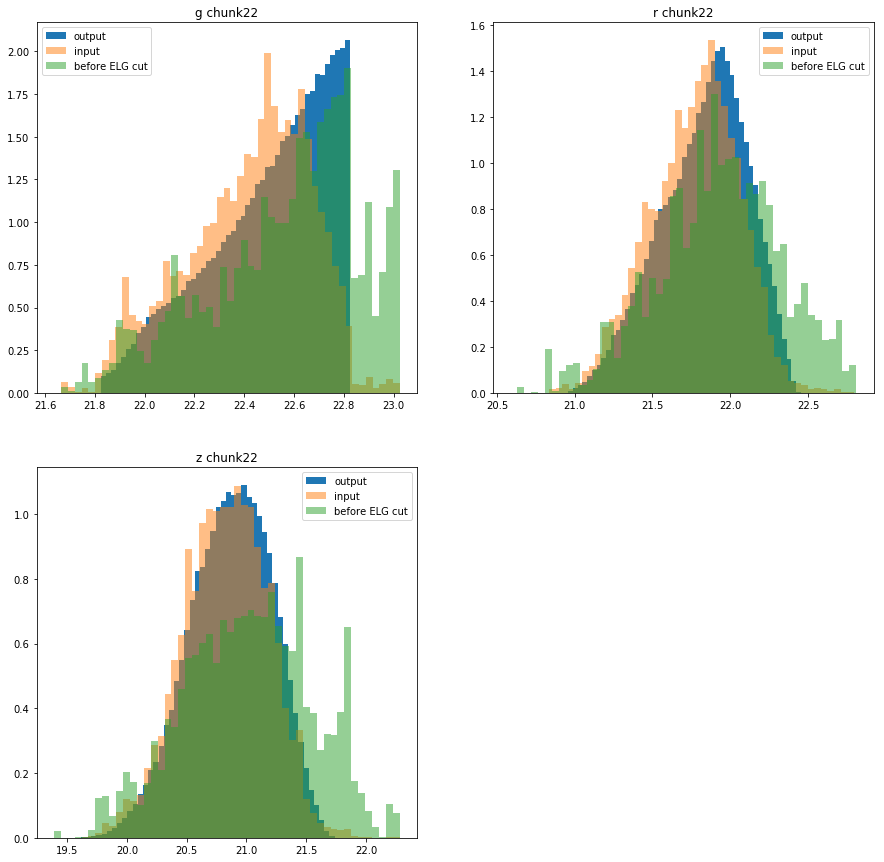

In [286]:
#g,r,z hist input,output (to ELG cut)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(mag(obiwan,'g'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['g'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.hist(sim['g'], label = 'before ELG cut', bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('g chunk22')

plt.subplot(2,2,2)
plt.hist(mag(obiwan,'r'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['r'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.hist(sim['r'], label = 'before ELG cut', bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('r chunk22')

plt.subplot(2,2,3)
plt.hist(mag(obiwan,'z'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['z'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.hist(sim['z'], label = 'before ELG cut', bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('z chunk22')

In [34]:
#compare with eboss data, all input

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'# of real elgs per Nside=128, mean:0.106520, std:0.021569')

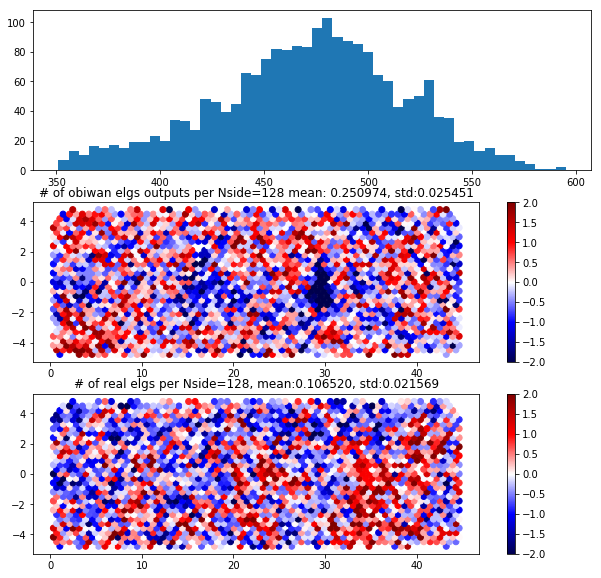

In [75]:
#output density
plt.clf()
import healpy as hp
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
pixs = hp.ang2pix(128,obiwan['ra'],obiwan['dec'], nest = True, lonlat = True)
pixs2 = hp.ang2pix(128,sim_m['ra'], sim_m['dec'], nest = True, lonlat = True)
N = 12*128**2
hist = np.zeros(N)
for i in range(len(pixs)):
    n = pixs[i]
    hist[n]+=1
hist2 = np.zeros(N)
for i in range(len(pixs2)):
    n = pixs2[i]
    hist2[n]+=1
ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist, format = 'D')
col4 = fits.Column(name = 'num2', array = hist2, format = 'D')
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4]).data


sel = dat['num2']
sel_num = sel>350
final = dat[sel_num]
plt.subplot(3,1,1)
pt1 = plt.hist(final['num2'],bins=50)

plt.subplot(3,1,2)
mean = (final['num']/final['num2']).mean()
std = (final['num']/final['num2']).std()
color=((final['num']/final['num2'])-mean)/std
sc = plt.scatter(final['ra'],final['dec'],c=color,vmax=-2,vmin=2, cmap = 'seismic')
plt.colorbar(sc)
plt.title('# of obiwan elgs outputs per Nside=128 mean: %f, std:%f' %(mean,std))


pixs = hp.ang2pix(128,DAT['ra'],DAT['dec'],nest = True, lonlat = True)
pixs2 = hp.ang2pix(128,sim_m['ra'], sim_m['dec'], nest = True, lonlat = True)
N = 12*128**2
hist = np.zeros(N)
for i in range(len(pixs)):
    n = pixs[i]
    hist[n]+=1
hist2 = np.zeros(N)
for i in range(len(pixs2)):
    n = pixs2[i]
    hist2[n]+=1
ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist, format = 'D')
col4 = fits.Column(name = 'num2', array = hist2, format = 'D')
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4]).data
sel = dat['num2']
sel_num = sel>350
final = dat[sel_num]
plt.subplot(3,1,3)
mean = (final['num']/final['num2']).mean()
std = (final['num']/final['num2']).std()
color= ((final['num']/final['num2']) - mean)/std
sc2 = plt.scatter(final['ra'],final['dec'],c=color,vmax=-2,vmin=2, cmap = 'seismic')
plt.colorbar(sc2)
plt.title('# of real elgs per Nside=128, mean:%f, std:%f' %(mean,std))

#devide by randoms, reject  few random pixels


Text(0.5,1,'# of obiwan elgs outputs per Nside=128, 0.6<z<1.1')

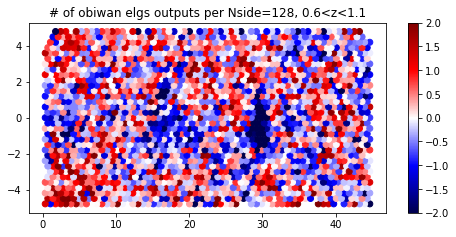

In [79]:
#output denisty 0.6<z<1.1
plt.figure(figsize=(8,3.5))
redshift = obiwan['nn_redshift']
obiwan_sel = (redshift<1.1)&(redshift>0.6)
pixs = hp.ang2pix(128,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
pixs2 = hp.ang2pix(128,sim_m['ra'], sim_m['dec'], nest = True, lonlat = True)
N = 12*128**2
hist = np.zeros(N)
for i in range(len(pixs)):
    n = pixs[i]
    hist[n]+=1
hist2 = np.zeros(N)
for i in range(len(pixs2)):
    n = pixs2[i]
    hist2[n]+=1
    
ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist, format = 'D')
col4 = fits.Column(name = 'num2', array = hist2   , format = 'D')
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4]).data
sel = dat['num2']
sel_num = sel>300
final = dat[sel_num]
mean = (final['num']/final['num2']).mean()
std =  (final['num']/final['num2']).std()
color = (final['num']/final['num2'] - mean)/std
sc = plt.scatter(final['ra'],final['dec'],c=color, cmap = 'seismic', vmax = 2, vmin = -2)
plt.colorbar(sc)
plt.title('# of obiwan elgs outputs per Nside=128, 0.6<z<1.1')

In [287]:
#mean <mag-mag_true> plot g,r,z
pixs = hp.ang2pix(128,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
pixs2 = hp.ang2pix(128,sim_m['ra'], sim_m['dec'], nest = True, lonlat = True)
N = 12*128**2
hist_n = np.zeros(N)
hist_mag_diff_g = np.zeros(N)
hist_mag_diff_r = np.zeros(N)
hist_mag_diff_z = np.zeros(N)
mag_g = mag(obiwan,'g')
mag_r =  mag(obiwan,'r')
mag_z = mag(obiwan,'z')
for i in range(len(pixs)):
    n = pixs[i]
    mag_diff_g = mag_g[i] - obiwan['g'][i]
    mag_diff_r = mag_r[i] - obiwan['r'][i]
    mag_diff_z = mag_z[i] - obiwan['z'][i]
    hist_mag_diff_g[n]+=mag_diff_g
    hist_mag_diff_r[n]+=mag_diff_r
    hist_mag_diff_z[n]+=mag_diff_z
    hist_n[n]+=1
hist2 = np.zeros(N)
for i in range(len(pixs2)):
    n = pixs2[i]
    hist2[n]+=1

In [288]:
ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist_n, format = 'D')
col4 = fits.Column(name = 'hist_mag_diff_g', array = hist_mag_diff_g, format = 'D')
col5 = fits.Column(name = 'hist_mag_diff_r', array = hist_mag_diff_r, format = 'D')
col6 = fits.Column(name = 'hist_mag_diff_z', array = hist_mag_diff_z, format = 'D')
col7 = fits.Column(name = 'num2', array = hist2, format = 'D')
#***
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5,col6,col7]).data
#***

In [89]:
def plt_gen(Color, dat = dat):
    plt.figure(figsize=(10,5))
    plt.subplot(2,1,1)
    sel = dat['num2']
    sel_num = (sel>300)
    final = dat[sel_num]
    hist_mag_diff_g_sel = final['hist_mag_diff_'+Color]/final['num']
    mean = (final['hist_mag_diff_'+Color]/final['num']).mean()
    std = (final['hist_mag_diff_'+Color]/final['num']).std()
    color = ((final['hist_mag_diff_'+Color]/final['num'])-mean)/std
    sc = plt.scatter(final['ra'],final['dec'],c=color,vmin = -2, vmax = 2, cmap = 'seismic')
    plt.colorbar(sc)
    plt.title(Color+' mag diff')
    plt.subplot(2,1,2)
    pt = plt.hist(color,bins = 50)
    pt2 = plt.hist(final['hist_mag_diff_'+Color]/final['num'], bins = 50, alpha = 0.4)
    plt.title(Color+' mag diff hist, mean: %f' % mean)

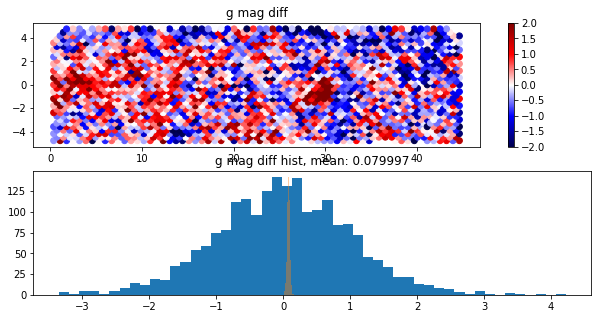

In [90]:
plt_gen('g')

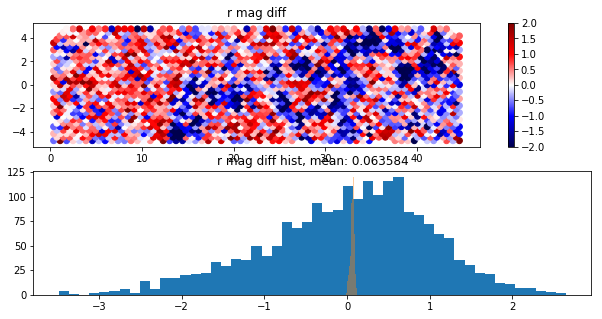

In [91]:
plt_gen('r')

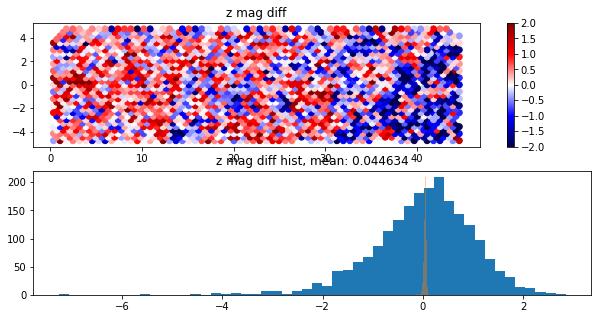

In [92]:
plt_gen('z')

In [63]:
#%input_good out


In [93]:
#%input_bad in
g = obiwan['g']
r_mag = obiwan['r']
z_mag = obiwan['z']
gr = g-r_mag
rz = r_mag - z_mag
color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
gL = 62.79716079
rL = 30.05661087
zL_sgc = 12.75
dat_bad = obiwan[color_sgc==False]
len(dat_bad)

22840

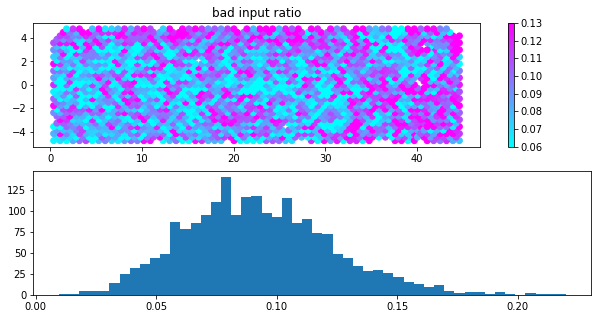

In [103]:
def bad_pix():
    pixs = hp.ang2pix(128,dat_bad['ra'],dat_bad['dec'],nest = True, lonlat = True)
    pixs2 = hp.ang2pix(128,sim_m['ra'], sim_m['dec'], nest = True, lonlat = True)
    N = 12*128**2
    hist = np.zeros(N)
    for i in range(len(pixs)):
        n = pixs[i]
        hist[n]+=1
    
    hist2 = np.zeros(N)
    for i in range(len(pixs2)):
        n = pixs2[i]
        hist2[n]+=1
    
    hist_all = np.zeros(N)
    pixs2 = hp.ang2pix(128,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
    for i in range(len(pixs2)):
        n = pixs2[i]
        hist_all[n]+=1

    ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
    col1 = fits.Column(name = 'ra', array = ra, format = 'D')
    col2 = fits.Column(name = 'dec', array = dec, format = 'D')
    col3 = fits.Column(name = 'num_bad', array = hist, format = 'D')
    col4 = fits.Column(name = 'num_all', array = hist_all, format = 'D')
    col5 = fits.Column(name = 'num2', array = hist2, format = 'D')
    dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5]).data
    sel = dat['num2']
    sel_num = sel>300
    final = dat[sel_num]
    n_ratio = final['num_bad']/final['num_all']
    #sel_ratio = (n_ratio<0.2)
    #super_final = final[sel_ratio]
    plt.figure(figsize=(8,4))
    color = final['num_bad']/final['num_all']
    plt.figure(figsize = (10,5))
    plt.subplot(2,1,1)
    sc2 = plt.scatter(final['ra'],final['dec'],c=color,vmin=0.06,vmax=0.13, cmap = 'cool')
    plt.colorbar(sc2)
    plt.title('bad input ratio')
    plt.subplot(2,1,2)
    pt = plt.hist(color,bins=50)
bad_pix()

In [110]:
dat.columns
obiwan_dat = dat

In [289]:
pixs = hp.ang2pix(128,DAT['ra'],DAT['dec'],nest = True, lonlat = True)
pixs2 = hp.ang2pix(128,sim_m['ra'], sim_m['dec'], nest = True, lonlat = True)
N = 12*128**2
hist = np.zeros(N)
for i in range(len(pixs)):
    n = pixs[i]
    hist[n]+=1
hist2 = np.zeros(N)
for i in range(len(pixs2)):
    n = pixs2[i]
    hist2[n]+=1
ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist, format = 'D')
col4 = fits.Column(name = 'num2', array = hist2, format = 'D')
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4]).data
sel = dat['num2']
sel_num = sel>350
final = dat[sel_num]
real_elg_dat = final

In [290]:
real_elg_dat.columns

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'num'; format = 'D'
    name = 'num2'; format = 'D'
)

In [310]:
def obiwan_dat_gen():
    ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
    col1 = fits.Column(name = 'ra', array = ra, format = 'D')
    col2 = fits.Column(name = 'dec', array = dec, format = 'D')
    col3 = fits.Column(name = 'num', array = hist_n, format = 'D')
    col4 = fits.Column(name = 'hist_mag_diff_g', array = hist_mag_diff_g, format = 'D')
    col5 = fits.Column(name = 'hist_mag_diff_r', array = hist_mag_diff_r, format = 'D')
    col6 = fits.Column(name = 'hist_mag_diff_z', array = hist_mag_diff_z, format = 'D')
    col7 = fits.Column(name = 'num2', array = hist2, format = 'D')
    #***
    dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5,col6,col7]).data
    #***
    sel = dat['num2']
    sel_num = sel>350
    return dat[sel_num]
obiwan_dat = obiwan_dat_gen()

In [311]:
obiwan_dat['num2']

array([ 527.,  515.,  532., ...,  567.,  500.,  548.])

In [312]:
def Hist(quantity1,quantity2 = 'num'):
    mean1 = obiwan_dat[quantity1].mean()
    mean2 = real_elg_dat[quantity2].mean()
    n,bins,patches = plt.hist(obiwan_dat[quantity1]/mean1*mean2,bins = 10,alpha = 0.5)
    n2,bins2,patches2 = plt.hist(real_elg_dat[quantity2],alpha = 0.5,bins = bins,color = 'orange')
    assert((bins == bins2).all())
    return n,n2,bins

In [313]:
mean1 = obiwan_dat['num'].mean()
mean2 = real_elg_dat['num'].mean()
(obiwan_dat['num']/mean1*mean2).sum(),real_elg_dat['num'].sum()

(101202.0, 101202.0)

[   8.    8.   57.  172.  416.  654.  423.  209.   63.   10.] [ 0.8         0.15686275  0.34337349  0.63468635  1.17514124  1.67692308
  1.34285714  1.0195122   0.41721854  0.16949153]


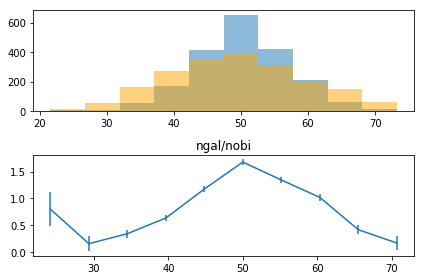

In [326]:
#<ngal> vs nobi
plt.subplot(2,1,1)
n,n2,bins = Hist(quantity1 = 'num')
plt.subplot(2,1,2)
bins_center = bins[:-1]+(bins[1]-bins[0])/2.
y1 = n/n2
plt.errorbar(bins_center,n/n2,1/sqrt(n2))
plt.title('ngal/nobi')
plt.tight_layout()
print(n,n/n2)

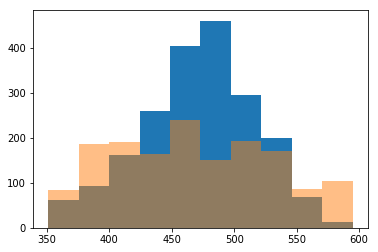

In [334]:
n,bins,patches = plt.hist(real_elg_dat['num2'],bins=10)
ss = real_elg_dat['num'].sum()/real_elg_dat['num2'].sum()
n2,bins2,patches2  = plt.hist(real_elg_dat['num']/ss,bins = bins,alpha=0.5)
y2 = bins[:-1]+(bins[1]-bins[0])/2


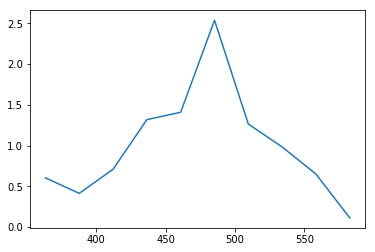

In [331]:
n,bins,patches = plt.hist(real_elg_dat['num2'],bins=10,weight = real_elg_dat['num2'])
plt.plot(bins[:-1]+(bins[1]-bins[0])/2,n/n2/(n/n2).mean())

In [315]:
#<ngal> vs frac bad
def bad_pix():
    pixs = hp.ang2pix(128,dat_bad['ra'],dat_bad['dec'],nest = True, lonlat = True)
    pixs2 = hp.ang2pix(128,sim_m['ra'], sim_m['dec'], nest = True, lonlat = True)
    N = 12*128**2
    hist = np.zeros(N)
    for i in range(len(pixs)):
        n = pixs[i]
        hist[n]+=1
    
    hist2 = np.zeros(N)
    for i in range(len(pixs2)):
        n = pixs2[i]
        hist2[n]+=1
    
    hist_all = np.zeros(N)
    pixs2 = hp.ang2pix(128,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
    for i in range(len(pixs2)):
        n = pixs2[i]
        hist_all[n]+=1

    ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
    col1 = fits.Column(name = 'ra', array = ra, format = 'D')
    col2 = fits.Column(name = 'dec', array = dec, format = 'D')
    col3 = fits.Column(name = 'num_bad', array = hist, format = 'D')
    col4 = fits.Column(name = 'num_all', array = hist_all, format = 'D')
    col5 = fits.Column(name = 'num2', array = hist2, format = 'D')
    dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5]).data
    sel = dat['num2']
    sel_num = sel>350
    final = dat[sel_num]
    return final
obiwan_w_bad = bad_pix()

[   391.   1623.   5867.  11663.  17138.  18604.  16410.  13527.   7303.
   4521.   2410.   1007.    335.    261.    142.]
[ 0.95956706  0.99500816  1.00156849  0.98507638  0.98762317  0.98624964
  0.99537738  0.99078582  1.03740437  1.06628914  0.99505039]


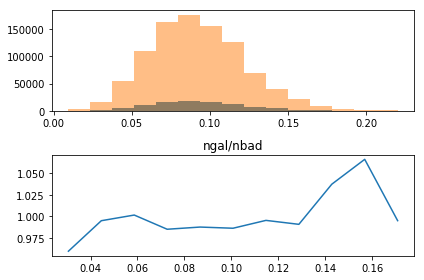

In [316]:
n_ratio = obiwan_w_bad['num_bad']/obiwan_w_bad['num_all']
def Hist2(quantity1,quantity2 = 'num',title = 'ngal/nbad',inf=1,sup=-2):
    mean1 = quantity1.mean()
    mean2 = real_elg_dat[quantity2].mean()
    plt.subplot(2,1,1)
    n,bins,patches = plt.hist(quantity1,bins = 15,weights = real_elg_dat[quantity2])
    n2,bins2,patches2 = plt.hist(quantity1,bins = bins,weights=obiwan_dat['num2'],alpha=0.5)
    assert((bins == bins2).all())
    plt.subplot(2,1,2)
    bin_center = (bins[1]-bins[0])/2.+bins[:-1]
    mean = (n[inf:sup]/n2[inf:sup]).mean()
    y = n[inf:sup]/n2[inf:sup]/mean
    print(n)
    print(y)
    plt.plot(bin_center[inf:sup],y)
    #plt.hist(bin_center[2:-2], rattio)
    plt.title(title)
    plt.tight_layout()
    
    return n,n2,bins
n,n2,bins = Hist2(n_ratio,sup=-3)

In [167]:
len(obiwan_w_bad),len(real_elg_dat)

(2020, 2020)

[   344.    801.   2149.   4695.   9203.  13540.  18874.  19070.  14873.
  10089.   4619.   2029.    638.    236.     42.]
[ 0.96856325  1.07117047  1.05161486  1.00393406  1.01000624  1.00979857
  1.00793428  0.98752317  1.00462899  0.96555808  0.94018301  0.97908501]


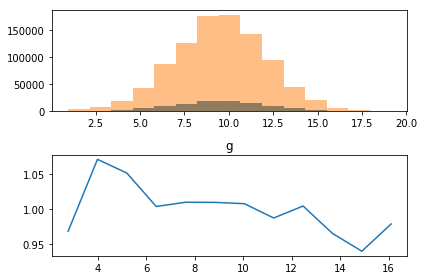

In [234]:
#<ngal> vs obiwan obj diff
ss = Hist2(obiwan_dat['hist_mag_diff_g'],title = 'g')

[    58.      0.     49.    129.    467.    857.   1847.   6243.  12298.
  21721.  27778.  20540.   7107.   1869.    239.]
[ 1.30547404  1.10922978  1.00569721  0.99627813  0.93552123  0.93837937
  0.93118826  0.94391049  0.93044785  0.90387364]


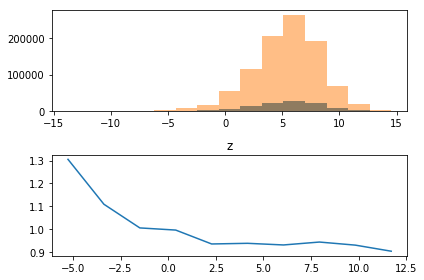

In [235]:
ss = Hist2(obiwan_dat['hist_mag_diff_z'],quantity2 = 'num',title = 'z',inf =4,sup=-1)

[   271.    682.   2493.   4080.   6005.   8623.  11714.  14000.  18384.
  14421.  11551.   4997.   2406.   1056.    519.]
[ 1.04060311  0.99496822  1.01666996  1.00048856  0.99772413  1.00228719
  1.00341699  0.99581969  0.98536427  1.01626631  0.94639156]


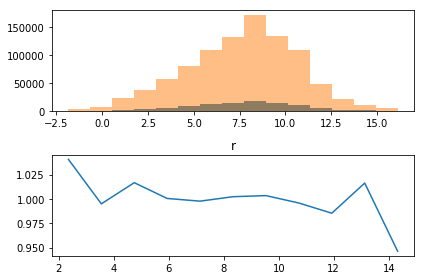

In [236]:
ss = Hist2(obiwan_dat['hist_mag_diff_r'],quantity2 = 'num',title = 'r',inf =3,sup=-1)

[  2294.   4035.   7445.  12251.  20221.  23665.  15648.  11157.   3659.
    827.]
[ 1.03761858  1.0324957   1.00044269  1.00585989  0.98417078  0.96947816
  0.96993421]


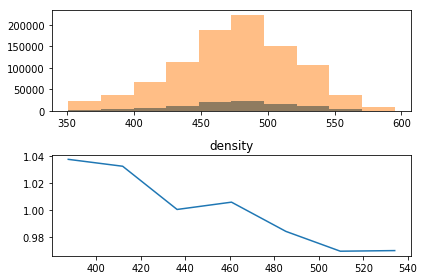

In [269]:
def Hist2(quantity1,quantity2 = 'num',title = 'density',inf=1,sup=-2):
    mean1 = quantity1.mean()
    mean2 = real_elg_dat[quantity2].mean()
    plt.subplot(2,1,1)
    n,bins,patches = plt.hist(quantity1,bins = 10,weights = real_elg_dat[quantity2])
    n2,bins2,patches2 = plt.hist(quantity1,bins = bins,alpha=0.5,weights = quantity1)
    assert((bins == bins2).all())
    plt.subplot(2,1,2)
    bin_center = (bins[1]-bins[0])/2.+bins[:-1]
    mean = (n[inf:sup]/n2[inf:sup]).mean()
    y = n[inf:sup]/n2[inf:sup]/mean
    print(n)
    print(y)
    plt.plot(bin_center[inf:sup],y)
    #plt.hist(bin_center[2:-2], rattio)
    plt.title(title)
    plt.tight_layout()
    
    return n,bins

n,bins = Hist2(real_elg_dat['num2'])

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


(array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 array([ 351. ,  375.4,  399.8,  424.2,  448.6,  473. ,  497.4,  521.8,
         546.2,  570.6,  595. ]),
 <a list of 10 Patch objects>)

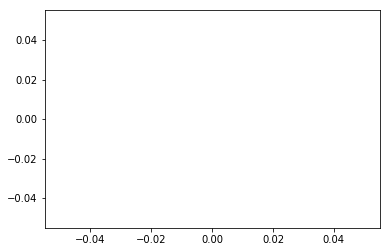

In [305]:
#n,Bins,patches=plt.hist(real_elg_dat['num2'],bins=10,normed = True)

MEAN= real_elg_dat['num'].sum()/real_elg_dat['num2'].sum()
n2,bins2,patches2 = plt.hist(real_elg_dat['num'],bins=Bins,alpha=0.5,normed = True)
plt.hist(obiwan_dat['num'],bins=Bins,alpha=0.5,normed = True)

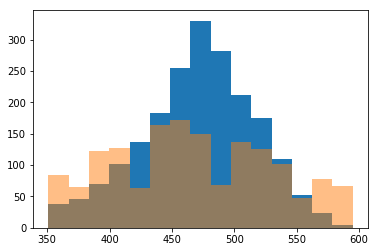

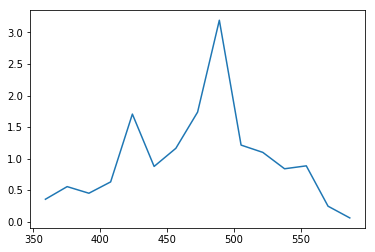

In [324]:
n2

array([  84.,   65.,  122.,  127.,   63.,  164.,  172.,  149.,   69.,
        137.,  125.,  102.,   47.,   77.,   67.])